Here we are going to use webscraping techniques to gather data from the current prem season and plot some graphs.

## Shots faced vs shots taken prem


In [176]:
import pandas as pd

url_df = 'https://fbref.com/en/comps/9/shooting/Premier-League-Stats'

df = pd.read_html(url_df)
df = pd.read_html(url_df)[0]
# creating a data with the same headers but without multi indexing
df.columns = [' '.join(col).strip() for col in df.columns]

df = df.reset_index(drop=True)
# creating a list with new names
new_columns = []
for col in df.columns:
  if 'level_0' in col:
      new_col = col.split()[-1]  # takes the last name
  else:
      new_col = col
  new_columns.append(new_col)

# rename columns
df.columns = new_columns
df = df.fillna(0)

df.head()
shots = df[['Squad', 'Standard SoT']]
print(type(shots['Standard SoT'][0]))
shots.head()

<class 'numpy.int64'>


,Squad,Standard SoT
0,Arsenal,153
1,Aston Villa,152
2,Bournemouth,132
3,Brentford,120
4,Brighton,160


In [177]:
url_df = 'https://fbref.com/en/comps/9/keepers/Premier-League-Stats'

df = pd.read_html(url_df)
df = pd.read_html(url_df)[0]
# creating a data with the same headers but without multi indexing
df.columns = [' '.join(col).strip() for col in df.columns]

df = df.reset_index(drop=True)
# creating a list with new names
new_columns = []
for col in df.columns:
  if 'level_0' in col:
      new_col = col.split()[-1]  # takes the last name
  else:
      new_col = col
  new_columns.append(new_col)

# rename columns
df.columns = new_columns
df = df.fillna(0)
shots_against = df[['Squad', 'Performance SoTA']]
shots['SoTA'] = shots_against['Performance SoTA']
shots['path'] = '/Users/pstanis/Documents/personal_projects/data_analysis/football_analysis/images/club_badges/' + shots['Squad'] + '.png'
shots

,Squad,Standard SoT,SoTA,path
0,Arsenal,153,65,/Users/pstanis/Documents/personal_projects/dat...
1,Aston Villa,152,118,/Users/pstanis/Documents/personal_projects/dat...
2,Bournemouth,132,149,/Users/pstanis/Documents/personal_projects/dat...
3,Brentford,120,150,/Users/pstanis/Documents/personal_projects/dat...
4,Brighton,160,115,/Users/pstanis/Documents/personal_projects/dat...
5,Burnley,95,171,/Users/pstanis/Documents/personal_projects/dat...
6,Chelsea,121,138,/Users/pstanis/Documents/personal_projects/dat...
7,Crystal Palace,109,113,/Users/pstanis/Documents/personal_projects/dat...
8,Everton,121,120,/Users/pstanis/Documents/personal_projects/dat...
9,Fulham,130,145,/Users/pstanis/Documents/personal_projects/dat...


(70.0, 200.0)

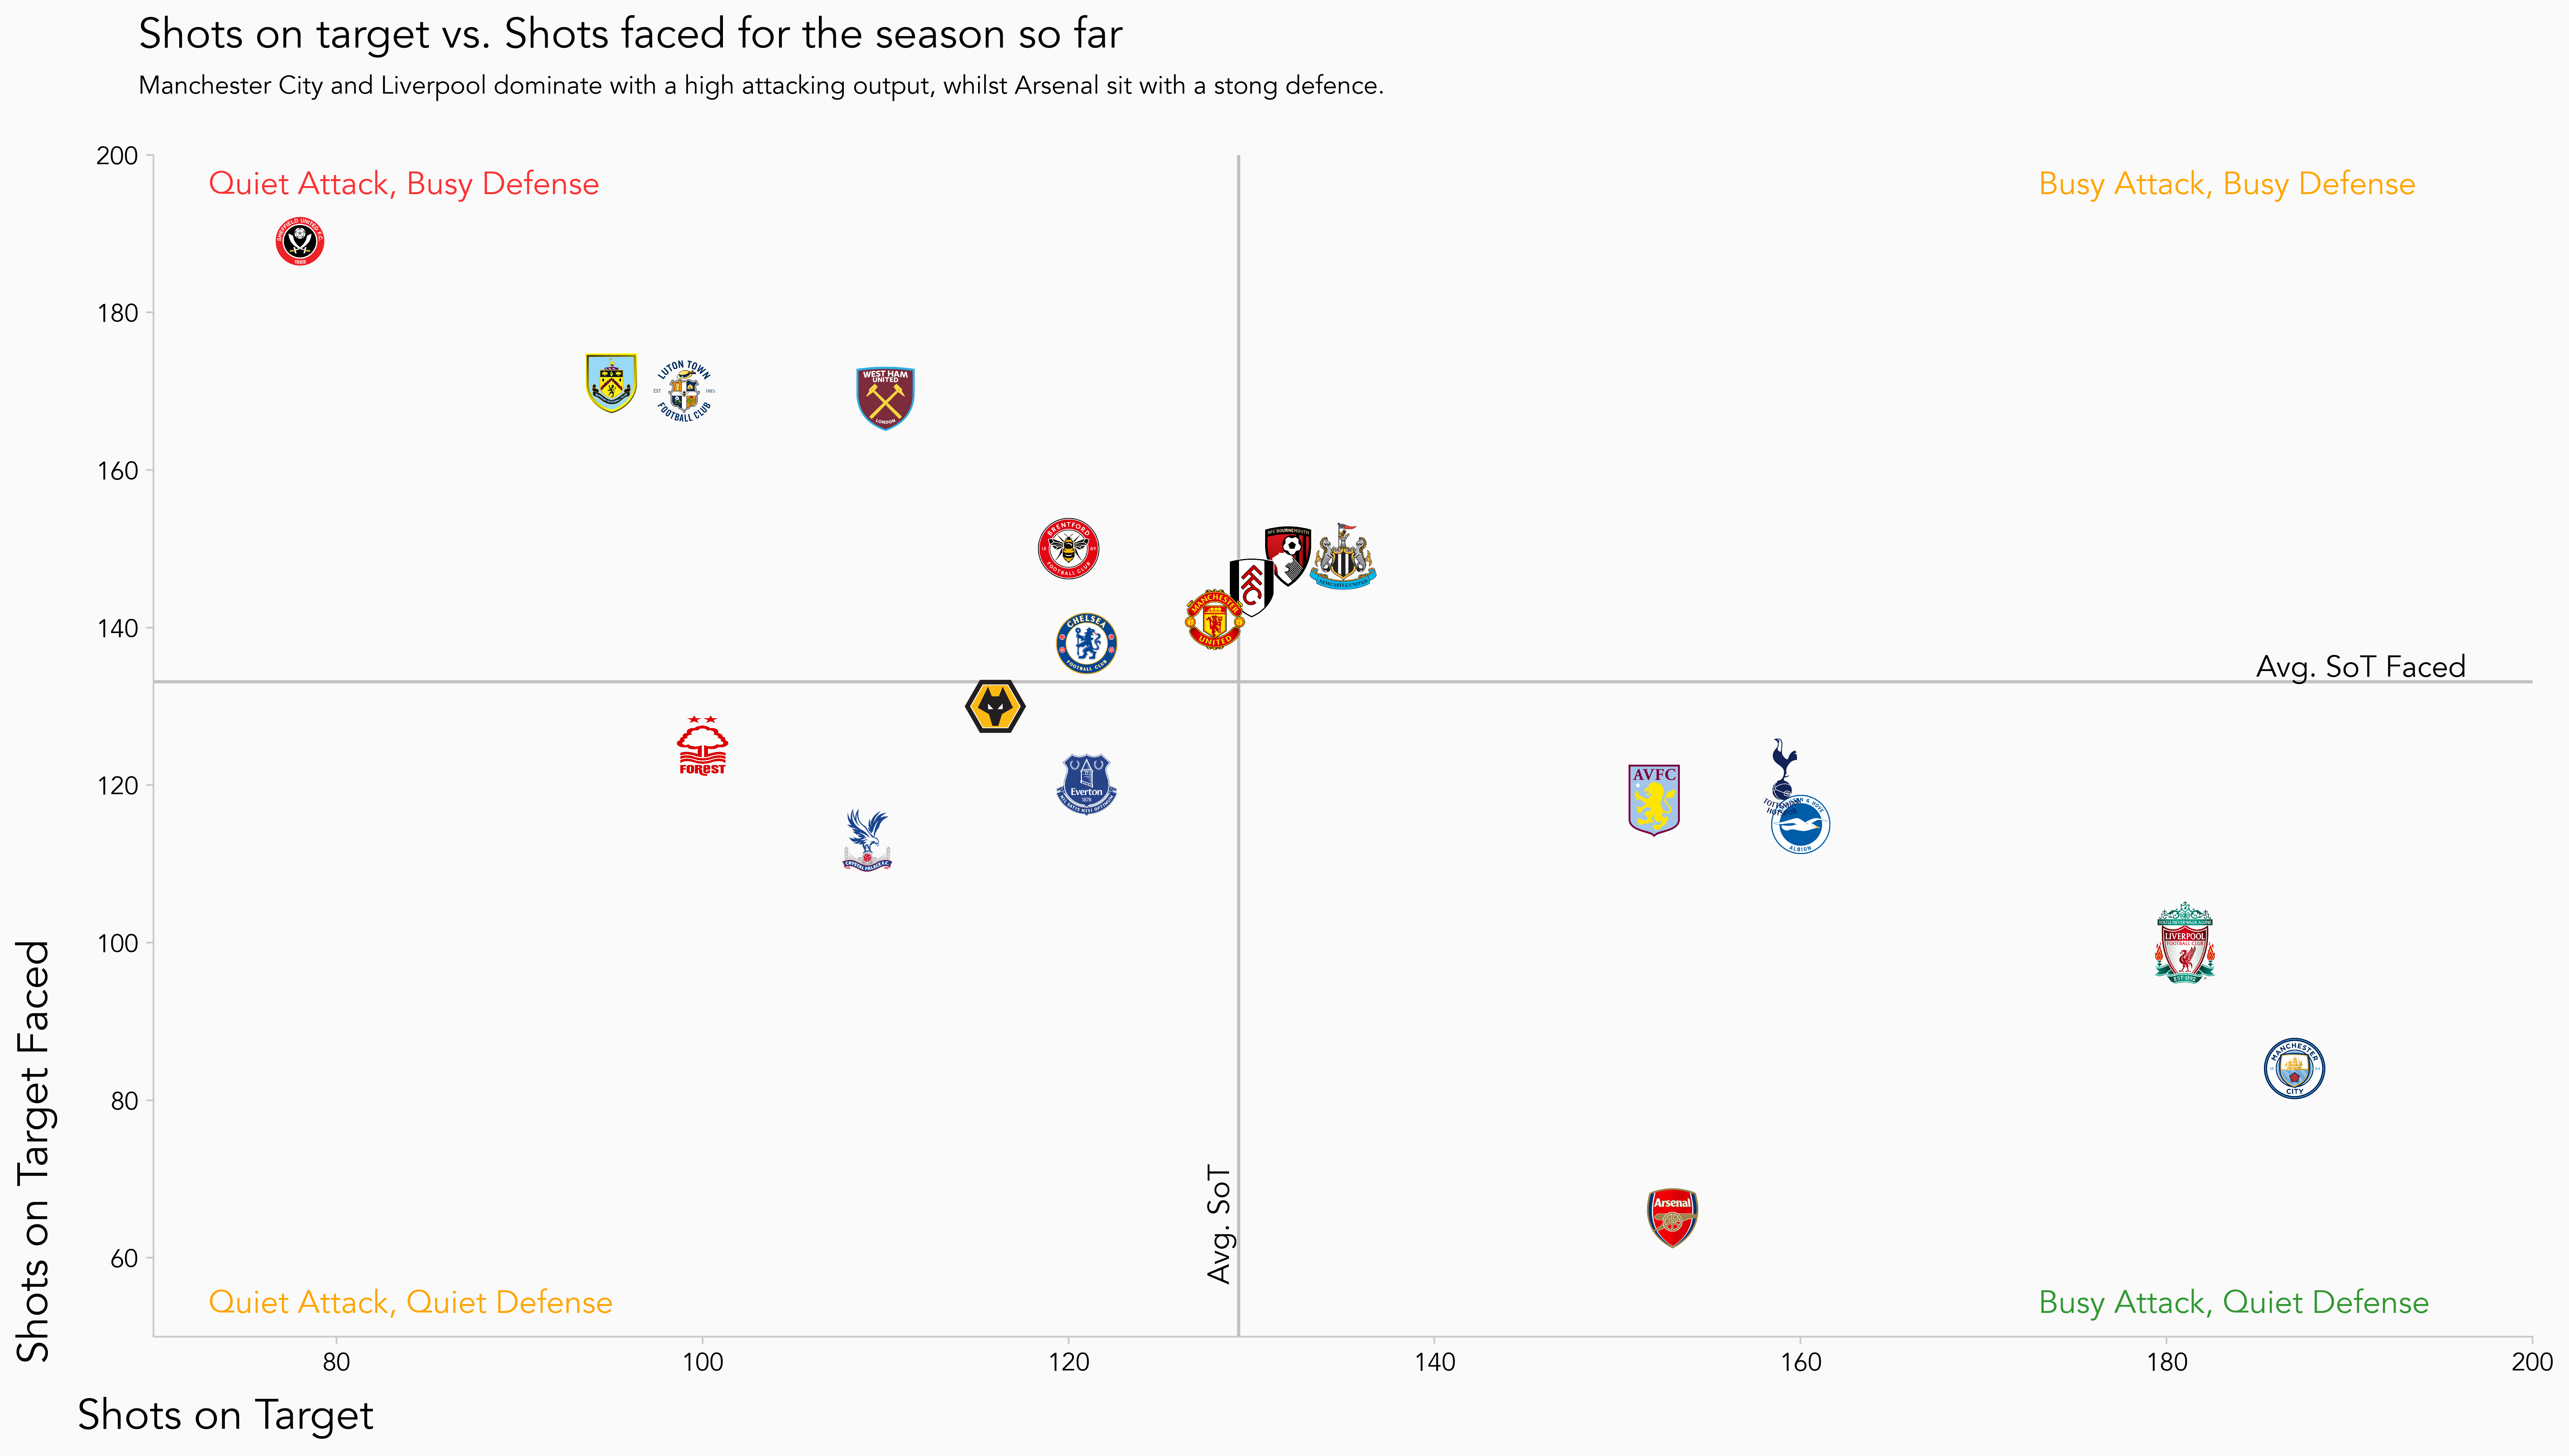

In [183]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

def getImage(path):
    return OffsetImage(plt.imread(path), zoom=.08, alpha = 1)

# Set font and background colour
plt.rcParams.update({'font.family':'Avenir'})
bgcol = '#fafafa'

fig, ax = plt.subplots(dpi=400)
fig.set_facecolor(bgcol)
ax.set_facecolor(bgcol)
x = shots['Standard SoT']
y = shots['SoTA']
labels = shots['Squad']
ax.scatter(x, y, color='white')

# Change plot spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_color('#ccc8c8')
ax.spines['bottom'].set_color('#ccc8c8')

# Change ticks
plt.tick_params(axis='x', labelsize=12, color='#ccc8c8')
plt.tick_params(axis='y', labelsize=12, color='#ccc8c8')

for index, row in shots.iterrows():
    ab = AnnotationBbox(getImage(row['path']), (row['Standard SoT'], row['SoTA']), frameon=False)
    ax.add_artist(ab)

# Add average lines
plt.hlines(y.mean(), 50, 220, color='#c2c1c0')
plt.vlines(x.mean(), 50, 200, color='#c2c1c0')

# Text

## Title & comment
fig.text(.12,.95,'Shots on target vs. Shots faced for the season so far',size=20)
fig.text(.12,.92,'Manchester City and Liverpool dominate with a high attacking output, whilst Arsenal sit with a stong defence.', size=12)

## Avg line explanation
fig.text(.08,.1,'Shots on Target Faced', size=20, color='black',rotation=90)
fig.text(.1,0.05,'Shots on Target', size=20, color='black')

## Axes titles
fig.text(.81,.54,'Avg. SoT Faced', size=14, color='black')
fig.text(.468,.15,'Avg. SoT', size=14, color='black',rotation=90)

plt.text(73, 195, 'Quiet Attack, Busy Defense', alpha=0.8, color='red', fontsize=15)
plt.text(173, 53, 'Busy Attack, Quiet Defense', alpha=0.8, color='green', fontsize=15)
plt.text(173, 195, 'Busy Attack, Busy Defense', alpha=1, color='orange', fontsize=15)
plt.text(73, 53, 'Quiet Attack, Quiet Defense', alpha=1, color='orange', fontsize=15)

fig.set_size_inches(20,10)
ax.set_ylim(50, 200)
ax.set_xlim(70, 200)

## xG vs Shots taken


Slightly different way of scraping data as we need the second table from the html which isnt easy.

In [210]:
import pandas as pd
import requests

url= 'https://fbref.com/en/comps/9/shooting/Premier-League-Stats'
response = requests.get(url).text.replace('<!--', '').replace('-->', '')
df = pd.read_html(response, header=1)[2]

df = df.reset_index(drop=True)
# creating a list with new names
new_columns = []
for col in df.columns:
  if 'level_0' in col:
      new_col = col.split()[-1]  # takes the last name
  else:
      new_col = col
  new_columns.append(new_col)

# rename columns
df.columns = new_columns
df = df.fillna(0)

dribbles = df[['Player', 'xG', 'Sh', 'SoT', 'Gls']]

dribbles['xG'] = pd.to_numeric(dribbles['xG'], errors='coerce')
dribbles['Sh'] = pd.to_numeric(dribbles['Sh'], errors='coerce')
dribbles['SoT'] = pd.to_numeric(dribbles['SoT'], errors='coerce')
dribbles['Gls'] = pd.to_numeric(dribbles['Gls'], errors='coerce')
dribbles = dribbles.loc[~((dribbles['xG'] == 0))]
dribbles = dribbles.loc[~((dribbles['xG'] < 3))]
dribbles = dribbles.reset_index(drop=True)
dribbles

/var/folders/s7/mksssm8112scb6_3__pw7kb00000gq/T/ipykernel_66312/1093473544.py:6: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df = pd.read_html(response, header=1)[2]
/var/folders/s7/mksssm8112scb6_3__pw7kb00000gq/T/ipykernel_66312/1093473544.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dribbles['xG'] = pd.to_numeric(dribbles['xG'], errors='coerce')
/var/folders/s7/mksssm8112scb6_3__pw7kb00000gq/T/ipykernel_66312/1093473544.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation:

,Player,xG,Sh,SoT,Gls
0,Elijah Adebayo,5.6,28.0,12.0,9.0
1,Simon Adingra,3.1,33.0,15.0,6.0
2,Miguel Almirón,4.5,40.0,11.0,3.0
3,Julián Álvarez,9.0,74.0,29.0,8.0
4,Zeki Amdouni,4.3,40.0,21.0,4.0
...,...,...,...,...,...
113,Callum Wilson,7.2,29.0,15.0,7.0
114,Yoane Wissa,8.0,53.0,18.0,7.0
115,Chris Wood,6.0,24.0,14.0,9.0
116,Player,NaN,NaN,NaN,NaN


(2.0, 23.0)

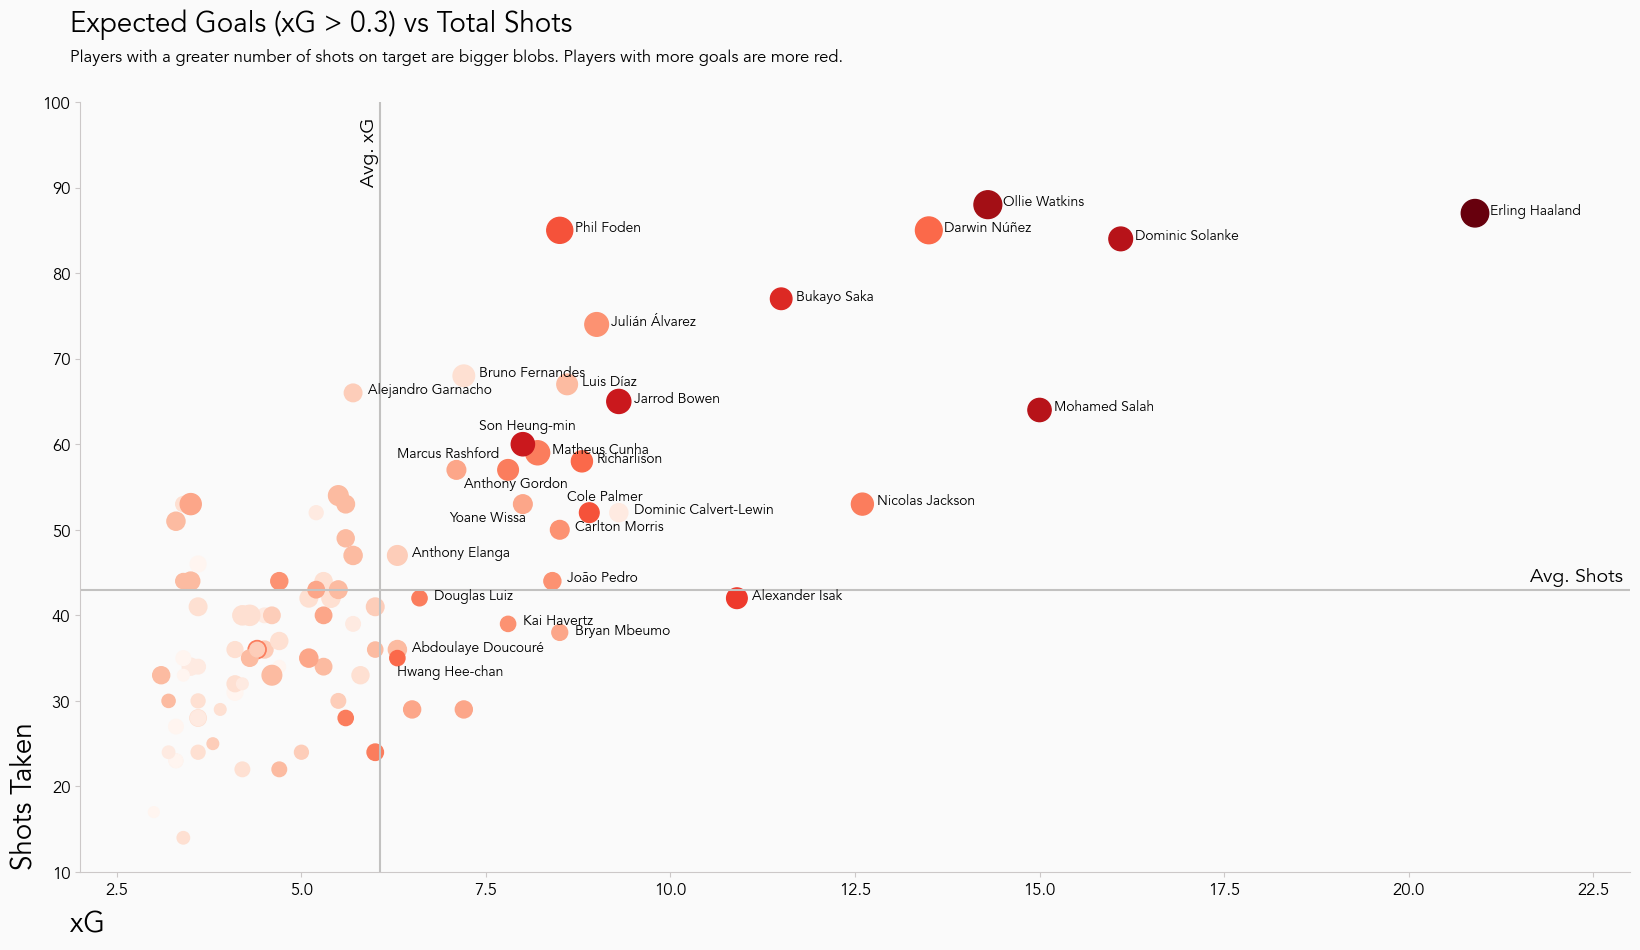

In [248]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm

# Set font and background colour
plt.rcParams.update({'font.family':'Avenir'})
bgcol = '#fafafa'

fig, ax = plt.subplots()
fig.set_facecolor(bgcol)
ax.set_facecolor(bgcol)
x = dribbles['xG']
y = dribbles['Sh']
c = dribbles['SoT']
goals = dribbles['Gls']
labels = dribbles['Player']
ax.scatter(x, y, c=goals, cmap='Reds', s=c*10)

for i, txt in enumerate(labels):
    if ((x[i] > 6) & (y[i] > 30)) | ((x[i] < 7.5) & (y[i] > 60)):
        if txt == "Marcus Rashford":
            ax.annotate(txt, (x[i]-0.8, y[i]+1.4))
        elif txt == "Son Heung-min":
            ax.annotate(txt, (x[i]-0.6, y[i]+1.7))
        elif txt == "Anthony Gordon":
            ax.annotate(txt, (x[i]-0.6, y[i]-2))
        elif txt == "Yoane Wissa":
            ax.annotate(txt, (x[i]-1, y[i]-2))
        elif txt == "Cole Palmer":
            ax.annotate(txt, (x[i]-0.3, y[i]+1.4))
        elif txt == "Hwang Hee-chan":
            ax.annotate(txt, (x[i], y[i]-2))
        else:
            ax.annotate(txt, (x[i]+0.2, y[i]-0.1))
    else:
        pass

# Change plot spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_color('#ccc8c8')
ax.spines['bottom'].set_color('#ccc8c8')

# Change ticks
plt.tick_params(axis='x', labelsize=12, color='#ccc8c8')
plt.tick_params(axis='y', labelsize=12, color='#ccc8c8')

# Add average lines
plt.hlines(y.mean(), 2, 23, color='#c2c1c0')
plt.vlines(x.mean(), 10,100, color='#c2c1c0')

## Avg line titles
fig.text(.85,.4,'Avg. Shots', size=14, color='black')
fig.text(.265,.8,'Avg. xG', size=14, color='black',rotation=90)

## Title & comment
fig.text(.12,.95,'Expected Goals (xG > 0.3) vs Total Shots',size=20)
fig.text(.12,.92,'Players with a greater number of shots on target are bigger blobs. Players with more goals are more red.', size=12)

## Avg line explanation
fig.text(.09,.12,'Shots Taken', size=20, color='black',rotation=90)
fig.text(.12,0.05,'xG', size=20, color='black')

fig.set_size_inches(20,10)
ax.set_ylim(10, 100)
ax.set_xlim(2, 23)

## Progressive passes per team


In [181]:
import pandas as pd

url_df = 'https://fbref.com/en/comps/9/passing/Premier-League-Stats'

df = pd.read_html(url_df)
df = pd.read_html(url_df)[0]
# creating a data with the same headers but without multi indexing
df.columns = [' '.join(col).strip() for col in df.columns]

df = df.reset_index(drop=True)
# creating a list with new names
new_columns = []
for col in df.columns:
  if 'level_0' in col:
      new_col = col.split()[-1]  # takes the last name
  else:
      new_col = col
  new_columns.append(new_col)

# rename columns
df.columns = new_columns
df = df.fillna(0)

df.head()
passes = df[['Squad', 'Total Cmp', 'PrgP']]
passes['path'] = '/Users/pstanis/Documents/personal_projects/data_analysis/football_analysis/images/club_badges/' + shots['Squad'] + '.png'

/var/folders/s7/mksssm8112scb6_3__pw7kb00000gq/T/ipykernel_66312/3109558394.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  passes['path'] = '/Users/pstanis/Documents/personal_projects/data_analysis/football_analysis/images/club_badges/' + shots['Squad'] + '.png'


(6000.0, 18500.0)

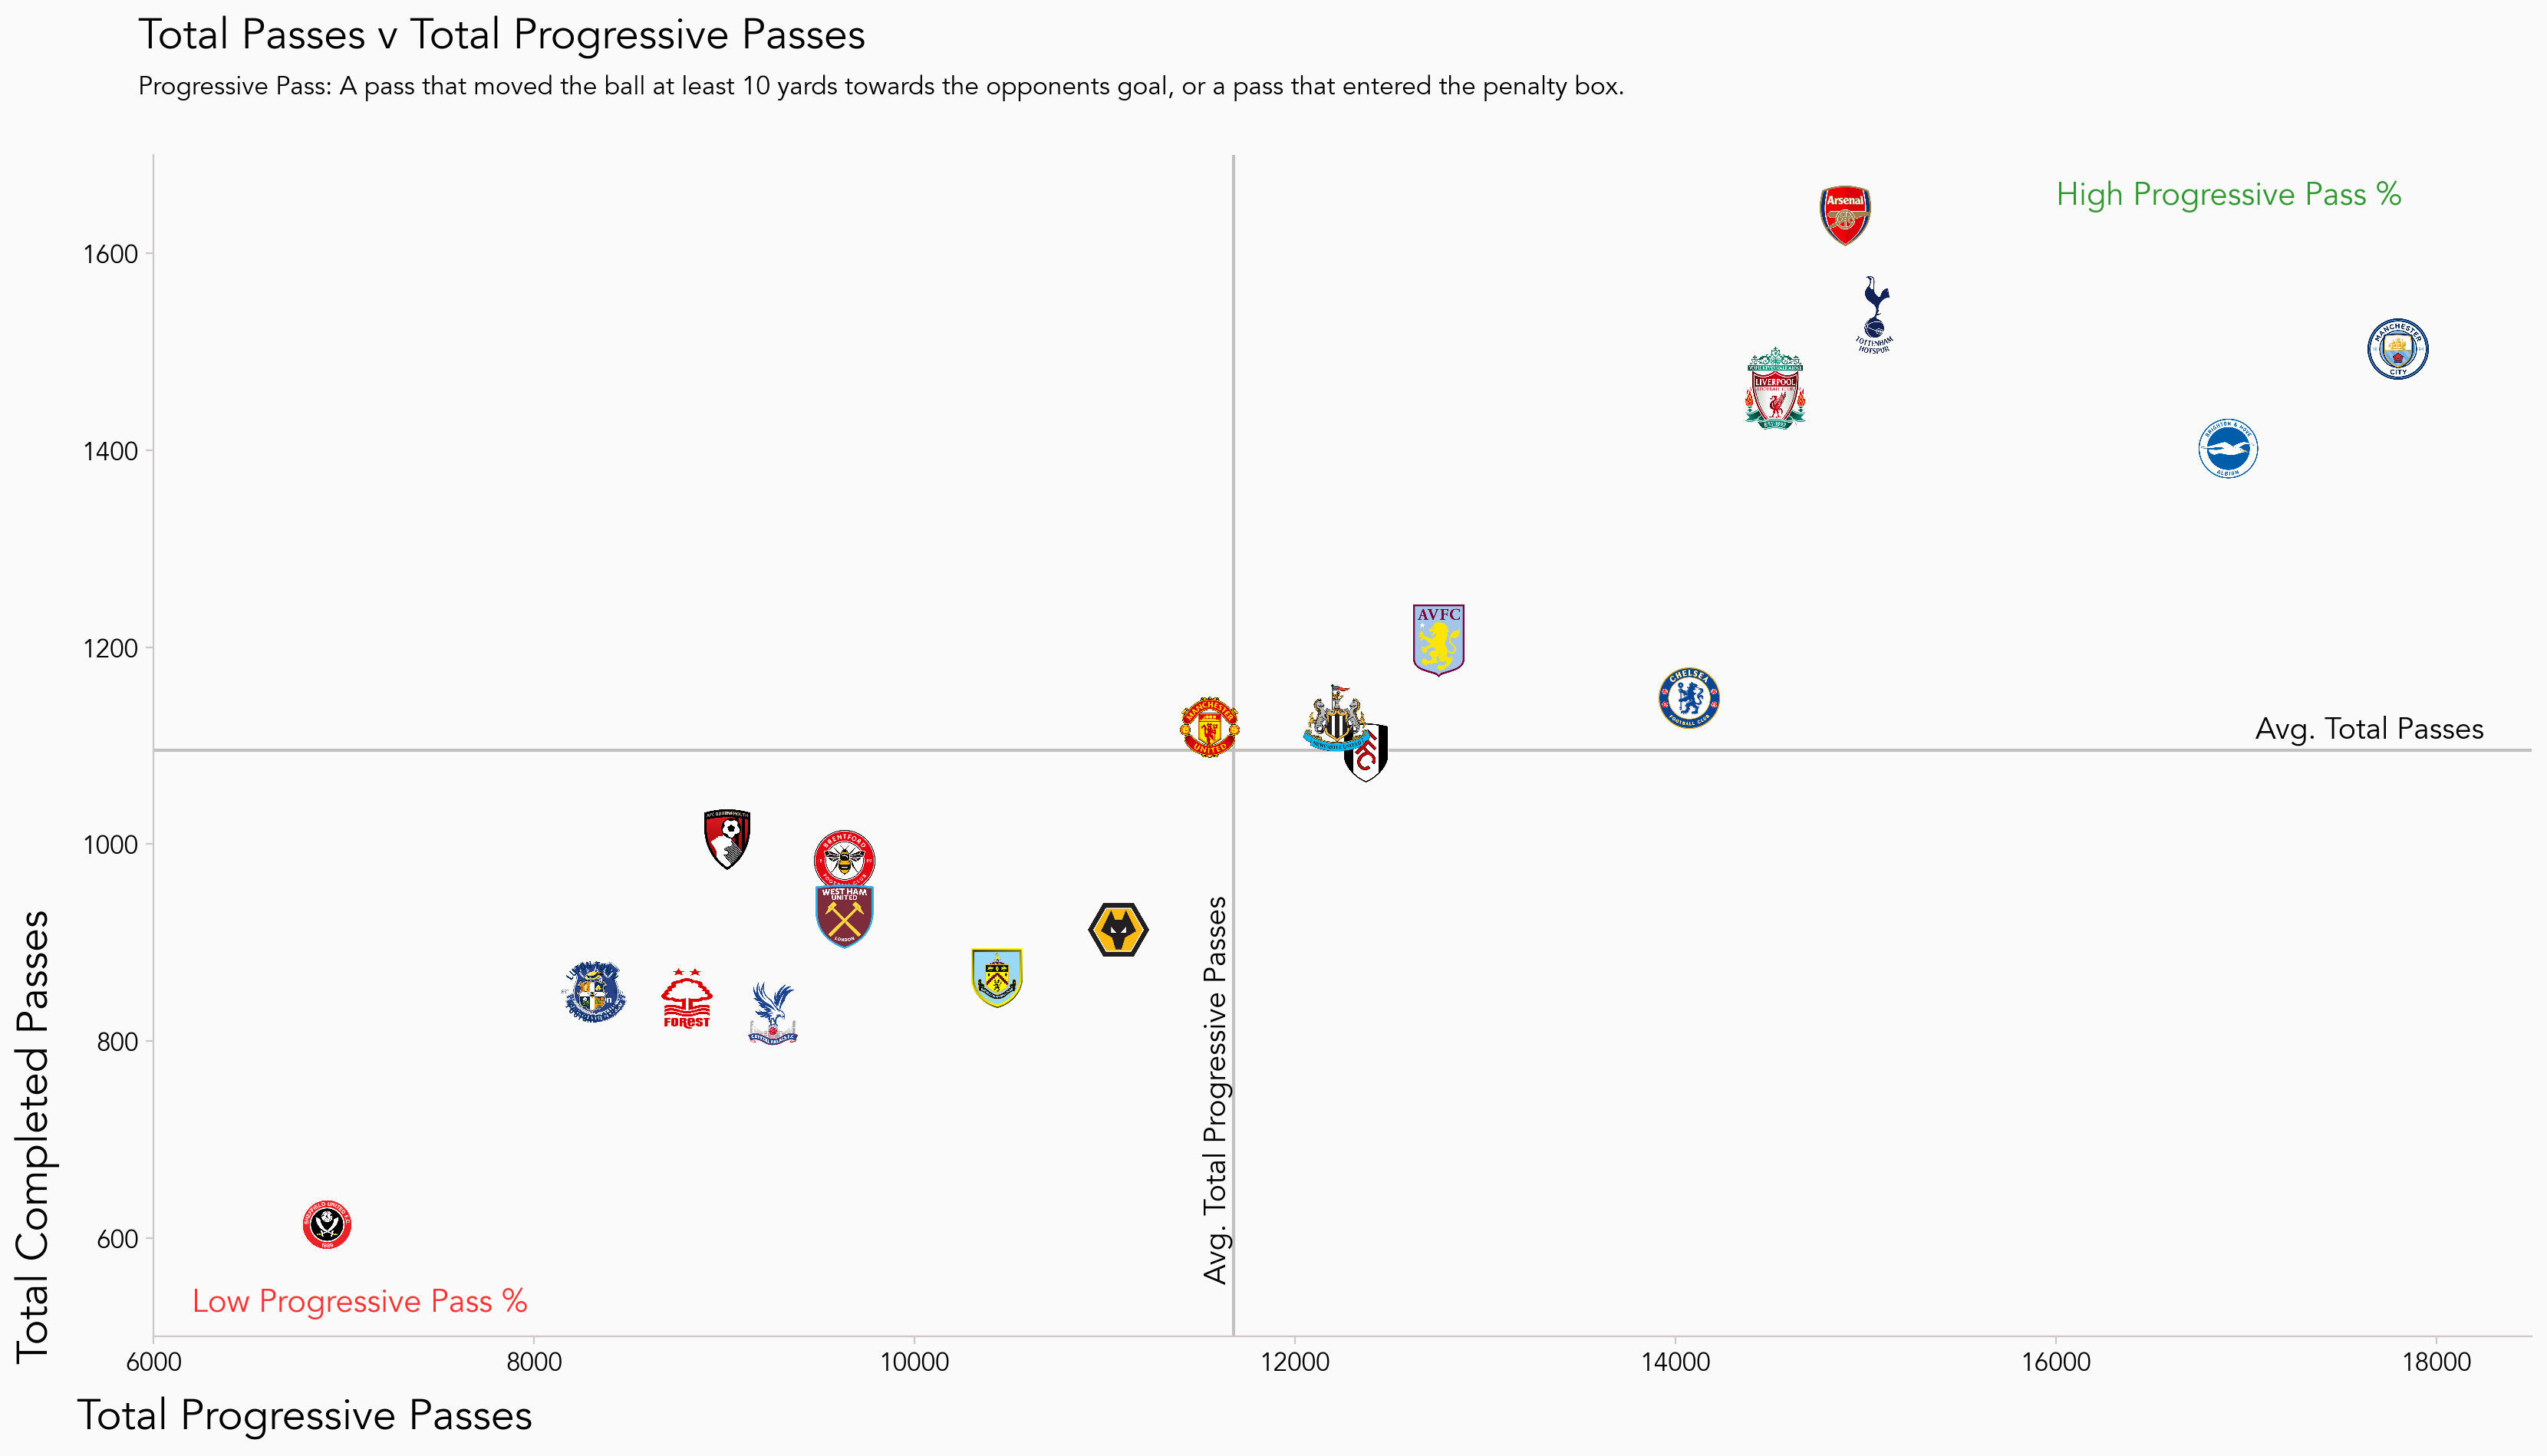

In [184]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

def getImage(path):
    return OffsetImage(plt.imread(path), zoom=.08, alpha = 1)

# Set font and background colour
plt.rcParams.update({'font.family':'Avenir'})
bgcol = '#fafafa'

fig, ax = plt.subplots( dpi=200)
fig.set_facecolor(bgcol)
ax.set_facecolor(bgcol)
x = passes['Total Cmp']
y = passes['PrgP']
labels = passes['Squad']
ax.scatter(x, y, color='white')

# Change plot spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_color('#ccc8c8')
ax.spines['bottom'].set_color('#ccc8c8')

# Change ticks
plt.tick_params(axis='x', labelsize=12, color='#ccc8c8')
plt.tick_params(axis='y', labelsize=12, color='#ccc8c8')

for index, row in passes.iterrows():
    ab = AnnotationBbox(getImage(row['path']), (row['Total Cmp'], row['PrgP']), frameon=False)
    ax.add_artist(ab)

# Add average lines
plt.hlines(y.mean(), 6000, 18500, color='#c2c1c0')
plt.vlines(x.mean(), 500, 1700, color='#c2c1c0')

# Text

## Title & comment
fig.text(.12,.95,'Total Passes v Total Progressive Passes',size=20)
fig.text(.12,.92,'Progressive Pass: A pass that moved the ball at least 10 yards towards the opponents goal, or a pass that entered the penalty box.', size=12)

## Axs titles
fig.text(.08,.1,'Total Completed Passes', size=20, color='black',rotation=90)
fig.text(.1,0.05,'Total Progressive Passes', size=20, color='black')

## Avg line titles
fig.text(.81,.50,'Avg. Total Passes', size=14, color='black')
fig.text(.467,.15,'Avg. Total Progressive Passes', size=14, color='black',rotation=90)

plt.text(16000, 1650, 'High Progressive Pass %', alpha=0.8, color='green', fontsize=15)
plt.text(6200, 525, 'Low Progressive Pass %', alpha=0.8, color='red', fontsize=15)

fig.set_size_inches(20,10)
ax.set_ylim(500, 1700)
ax.set_xlim(6000, 18500)